# Setup Sparql Endpoint

In [18]:
from SPARQLWrapper import SPARQLWrapper, JSON
import igraph as ig

A small routine to run and return a query

In [19]:
def runQuery(query):
    sparql = SPARQLWrapper(
        "http://localhost:8080/blazegraph/namespace/kb/sparql" # This is the workshop endpoint
    )
    sparql.setReturnFormat(JSON)                     # and we want json as returns
    sparql.setQuery(query)
    try:
        ret = sparql.queryAndConvert()
        return ret["results"]["bindings"]
    except Exception as e:
        print(e)
        return 
    

## What type of relations are in the graph?

Since triples are encoded as `subject->predicat->object`, we first query for distinct predicats in the graph. Do not forget to change to your namedgraph! Just put it in the brackets `<mygraphname>`.

In [20]:
distinctP = runQuery("""
    PREFIX crm: <http://cidoc-crm.org/cidoc-crm/>

    SELECT DISTINCT ?p
        FROM <http://example.org/ns/users/malte/genesis-example-geo2>
    WHERE {
        ?s ?p ?o .  
    }
    LIMIT 100
    """
)

In [21]:
distinctP

[{'p': {'type': 'uri',
   'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'}},
 {'p': {'type': 'uri', 'value': 'http://xmlns.com/foaf/0.1/homepage'}},
 {'p': {'type': 'uri', 'value': 'http://xmlns.com/foaf/0.1/name'}},
 {'p': {'type': 'uri',
   'value': 'http://www.w3.org/ns/activitystreams#generator'}},
 {'p': {'type': 'uri', 'value': 'http://www.w3.org/ns/oa#hasBody'}},
 {'p': {'type': 'uri', 'value': 'http://www.w3.org/ns/oa#hasTarget'}},
 {'p': {'type': 'uri',
   'value': 'http://cidoc-crm.org/cidoc-crm/E70_documents'}},
 {'p': {'type': 'uri', 'value': 'http://purl.org/dc/terms/issued'}},
 {'p': {'type': 'uri', 'value': 'http://www.w3.org/ns/oa#hasPurpose'}},
 {'p': {'type': 'uri',
   'value': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#value'}},
 {'p': {'type': 'uri', 'value': 'http://purl.org/dc/terms/modified'}},
 {'p': {'type': 'uri', 'value': 'http://www.w3.org/ns/oa#hasSelector'}},
 {'p': {'type': 'uri', 'value': 'http://www.w3.org/ns/oa#hasSource'}},
 {'p': {'type':

Lets look at relations with `crm:E70`:

In [22]:
distinctObjects = runQuery("""
    PREFIX crm: <http://cidoc-crm.org/cidoc-crm/>

    SELECT DISTINCT ?o
        FROM <http://example.org/ns/users/malte/genesis-example-geo2>
    WHERE {
        ?s crm:E70_documents ?o .
    }
    LIMIT 100
    """
)

In [23]:
distinctObjects[:5]

[{'o': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Noah'}},
 {'o': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Hadoram'}},
 {'o': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Calneh'}},
 {'o': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Cush'}},
 {'o': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Cain'}}]

These are persons, more or less. Lets see what subject and object `crm:P152` connects.

## Query edges


In [24]:
linkedObjects = runQuery("""
    PREFIX crm: <http://cidoc-crm.org/cidoc-crm/>

    SELECT ?son ?father
        FROM <http://example.org/ns/users/malte/genesis-example-geo2>
    WHERE {
        ?son crm:P152_has_parent ?father .
    }
    LIMIT 1000
    """
)

In [25]:
linkedObjects[:5]


[{'son': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Seth'},
  'father': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Adam'}},
 {'son': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Methushael'},
  'father': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Mehujael'}},
 {'son': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Enoch'},
  'father': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Cain'}},
 {'son': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Enoch'},
  'father': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/persons/Jared'}},
 {'son': {'type': 'uri',
   'value': 'http://example.org/ns/users/malte/genesis-example-geo2/person

These are edges of a graph! Extract source and target..

In [26]:
edgeList = []
for elem in linkedObjects:
    edgeList.append( 
        (elem['father']['value'], elem['son']['value'])
    )

In [27]:
edgeList[:5]

[('http://example.org/ns/users/malte/genesis-example-geo2/persons/Adam',
  'http://example.org/ns/users/malte/genesis-example-geo2/persons/Seth'),
 ('http://example.org/ns/users/malte/genesis-example-geo2/persons/Mehujael',
  'http://example.org/ns/users/malte/genesis-example-geo2/persons/Methushael'),
 ('http://example.org/ns/users/malte/genesis-example-geo2/persons/Cain',
  'http://example.org/ns/users/malte/genesis-example-geo2/persons/Enoch'),
 ('http://example.org/ns/users/malte/genesis-example-geo2/persons/Jared',
  'http://example.org/ns/users/malte/genesis-example-geo2/persons/Enoch'),
 ('http://example.org/ns/users/malte/genesis-example-geo2/persons/Lamech',
  'http://example.org/ns/users/malte/genesis-example-geo2/persons/Noah')]

## Generate a graph

In [28]:
graph = ig.Graph.TupleList(edgeList, directed=True)

In [29]:
graph.vs['label'] = [x['name'].split('/')[-1] for x in graph.vs]

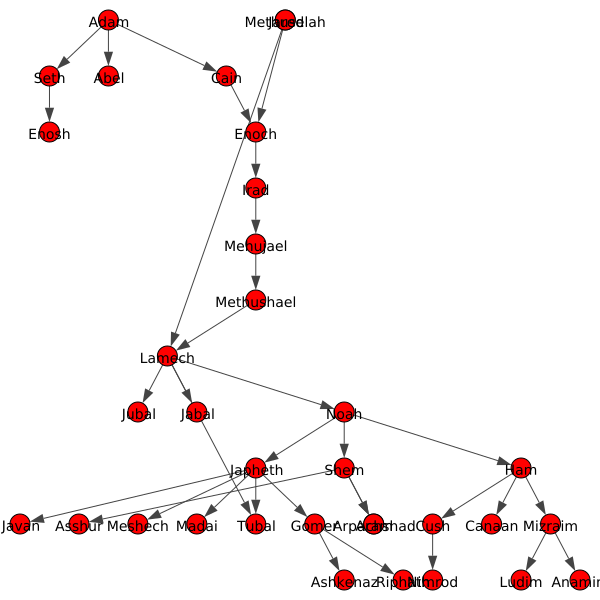

In [30]:
ig.plot(graph, layout="sugiyama")